<a href="https://colab.research.google.com/github/Rahul2899/Deep_learning/blob/main/Cat_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
... resuming from 512753664 bytes (630138030 bytes left) ...
 99% 1.05G/1.06G [00:06<00:00, 63.7MB/s]
100% 1.06G/1.06G [00:06<00:00, 101MB/s] 


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [7]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.


In [8]:
validation_ds=tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 5000 files belonging to 2 classes.


In [9]:
#Normalize

def preprocess(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

  train_ds = train_ds.map(preprocess)
  validation_ds = validation_ds.map(preprocess)

In [10]:
#create cnn  model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 61s 85ms/step - loss: 2.9528 - accuracy: 0.5840 - val_loss: 0.6607 - val_accuracy: 0.6180
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.6430 - accuracy: 0.6317 - val_loss: 0.6602 - val_accuracy: 0.6214
Epoch 3/10
625/625 [==============================] - 55s 87ms/step - loss: 0.5633 - accuracy: 0.7009 - val_loss: 0.7661 - val_accuracy: 0.6178
Epoch 4/10
625/625 [==============================] - 53s 84ms/step - loss: 0.4552 - accuracy: 0.7728 - val_loss: 0.9389 - val_accuracy: 0.6228
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3975 - accuracy: 0.8159 - val_loss: 1.1048 - val_accuracy: 0.6228
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.3128 - accuracy: 0.8668 - val_loss: 1.4359 - val_accuracy: 0.6134
Epoch 7/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2724 - accuracy: 0.8920 - val_loss: 1.5331 - val_accuracy:

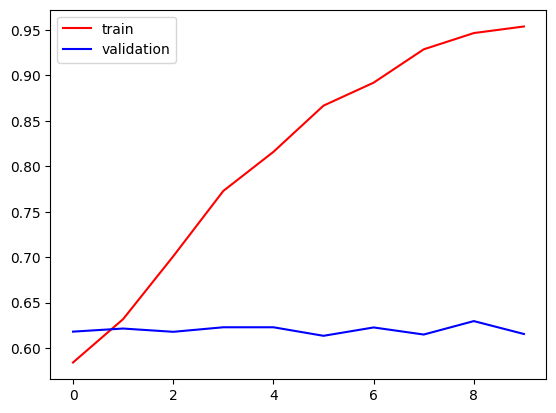

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

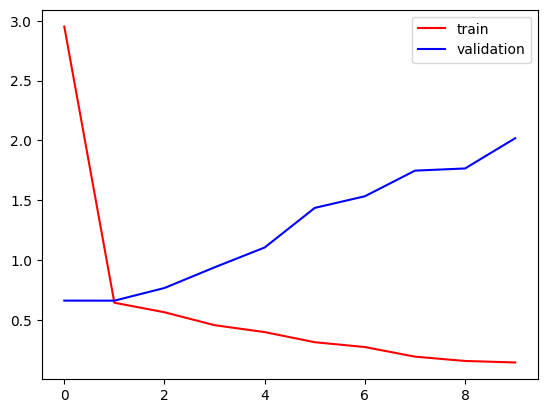

In [15]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [17]:
#After adding dropout and batch normalization
#create cnn  model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 68s 104ms/step - loss: 0.8561 - accuracy: 0.6118 - val_loss: 0.5894 - val_accuracy: 0.7024
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5421 - accuracy: 0.7245 - val_loss: 0.5533 - val_accuracy: 0.7246
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4573 - accuracy: 0.7849 - val_loss: 0.5113 - val_accuracy: 0.7484
Epoch 4/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3721 - accuracy: 0.8332 - val_loss: 0.4877 - val_accuracy: 0.7726
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2973 - accuracy: 0.8727 - val_loss: 0.5028 - val_accuracy: 0.7904
Epoch 6/10
625/625 [==============================] - 64s 101ms/step - loss: 0.2354 - accuracy: 0.9014 - val_loss: 0.6188 - val_accuracy: 0.7934
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1865 - accuracy: 0.9227 - val_loss: 0.5460 - val_ac

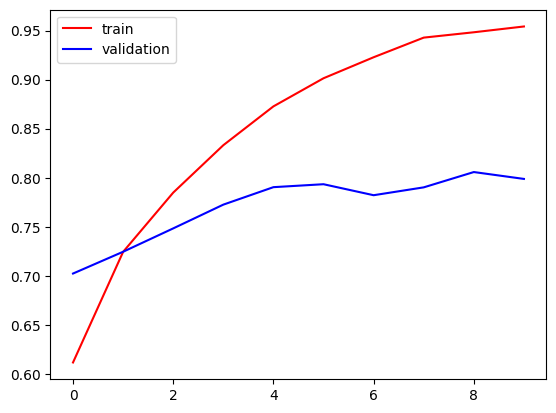

In [21]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

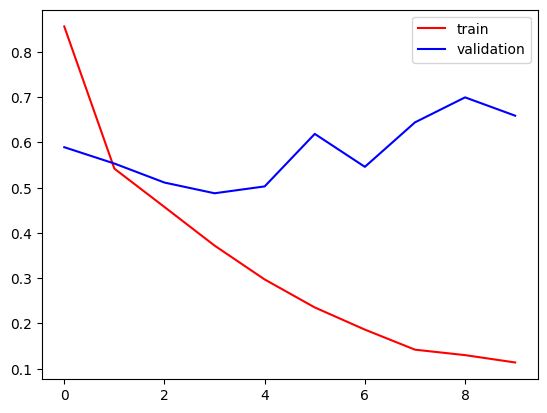

In [22]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()